In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pathlib import Path  
import glob
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

from collections import Counter

In [2]:
def clean_data(filename):

    # load data
    file = open(f"./data/{filename}.txt","r+")
    text = file.read()
    file.close()
    
    # split into words
    tokens = word_tokenize(text)
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    punct = [w.translate(table) for w in tokens]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    sw = [w for w in punct if not w in stop_words]
    
    # remove remaining tokens that are not alphabetic
    alpha = [word for word in sw if word.isalpha()]

    # convert to lower case
    lower = [w.lower() for w in alpha ]

    
    
    # determine tags
    tags = pos_tag(lower)
    tg = [t for t in tags]

    filtertg = [w for w,t in tg
              if t == "NN"
              or t == "NNS"
              or t == "NNP"
              or t == "NNPS"
              or t == "FW"]
    
    #lemmatize
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in filtertg if len(word)>3]
    
    
    #snowball_stemmer_obj = SnowballStemmer("english")
    #stemm = [snowball_stemmer_obj.stem(word) for word in filtertg]
    
    results = [word for word in lem
        if word !='project' 
        and word !='gutenbergtm'
        and word !='gutenberg'
        and word !='ebook'
        and word !='chapter'
        and word !='work'
        and word !='nothing'
        and word !='thing'
        and word !='anything'
        and word !='something'
        and word !='time'
        and word !='sidenote']
    
    return results
    
    
    
    

In [3]:
def word_cloud(book):
    clean =  clean_data(book)
    
    unique_string=(" ").join(clean)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

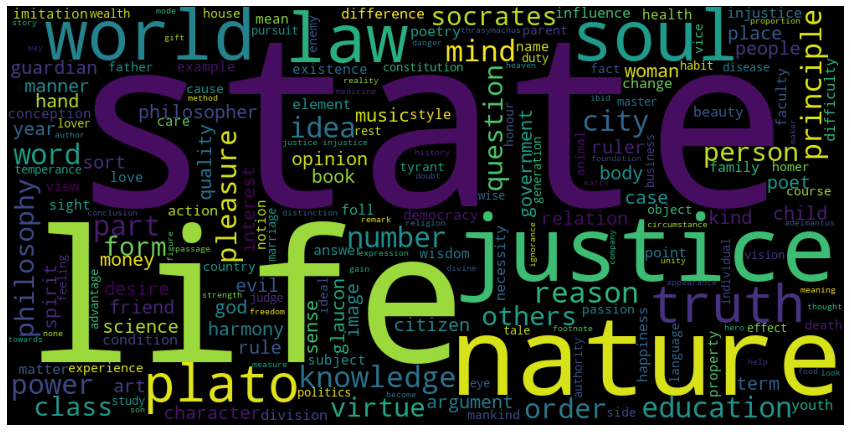

In [32]:
cloud = word_cloud('Untitled')

In [5]:
def cleantxt(): 

    text_files = glob.glob("/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/data/*.txt")
    text_titles = [Path(text).stem for text in text_files]
    for title in text_titles:
        cleaned = clean_data(title)
        with open(f"{title}.txt",'w',encoding='utf-8') as F:
            for s in cleaned:
                F.write("%s\n" % s)


In [6]:
#a = cleantxt()

In [7]:
directory_path ="/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/"
text_files = glob.glob(f"{directory_path}/*.txt")
text_files = glob.glob("/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/*.txt")
text_titles = [Path(text).stem for text in text_files]

In [41]:
vect = TfidfVectorizer(input='filename',min_df = 1, max_df = 0.3
                       
                       , stop_words='english')
vect_text = vect.fit_transform(text_files)
df = pd.DataFrame(vect_text.toarray(), index=text_titles, columns=vect.get_feature_names()).T
df      

,History of Phosphorus,Mother Storie,Little Lord Fauntleroy,alice-in-wonderland,The History of England from the Accession of James II,The Secret Garden,The History Of The Decline And Fall Of The Roman Empire,Histories of two hundred and fifty-one divisions of the German army which participated in the wa,The Last Leaf,The Chemistry of Cookery,...,The Railway Children,Among the Forest People,History of King Charles The First of England,The French Revolution,The Greater Republic,The Magic of Oz,How the Flag Became Old Glory,The Gases of the Atmosphere The History of Their Discovery by William Ramsay,The Princess and the Goblin,The Magic Fishbone
aaron,0.006866,0.0,0.000000,0.0,0.0,0.000000,0.000492,0.0,0.005520,0.0,...,0.0,0.0,0.0,0.002887,0.010935,0.0,0.0,0.0,0.0,0.0
aaschik,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001228,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
abacinare,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000409,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
aback,0.000000,0.0,0.002768,0.0,0.0,0.002052,0.000000,0.0,0.007691,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
abactores,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000409,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ὁδος,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ὕπερθεν,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ὠκεανὸς,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ὲἱσης,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.001600,0.000000,0.0,0.0,0.0,0.0,0.0


In [47]:

lsa_model = TruncatedSVD(n_components=3, n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text).T

In [48]:
explained_variance = lsa_model.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))

Sum of explained variance ratio: 11%


In [49]:
df = pd.DataFrame(
lsa_top,
index=['Topic 1', 'Topic 2', 'Topic 3'],
columns=[text_titles]).T
df

,Topic 1,Topic 2,Topic 3
History of Phosphorus,0.133975,0.621331,-0.017540
Mother Storie,0.045883,0.007962,0.064081
Little Lord Fauntleroy,0.031147,-0.000447,0.011999
alice-in-wonderland,0.027033,0.012450,0.962962
The History of England from the Accession of James II,0.364659,-0.047443,0.067036
The Secret Garden,0.015274,0.002395,0.010876
The History Of The Decline And Fall Of The Roman Empire,0.313936,-0.029470,0.032610
Histories of two hundred and fifty-one divisions of the German army which participated in the wa,0.053578,-0.008759,0.003958
The Last Leaf,0.304567,-0.029453,0.018845
The Chemistry of Cookery,0.146500,0.546119,0.002825


In [50]:
df2 = df.idxmax(axis=1)
df2


History of Phosphorus                                                                               Topic 2
Mother Storie                                                                                       Topic 3
Little Lord Fauntleroy                                                                              Topic 1
alice-in-wonderland                                                                                 Topic 3
The History of England from the Accession of James II                                               Topic 1
The Secret Garden                                                                                   Topic 1
The History Of The Decline And Fall Of The Roman Empire                                             Topic 1
Histories of two hundred and fifty-one divisions of the German army which participated in the wa    Topic 1
The Last Leaf                                                                                       Topic 1
The Chemistry of Cookery    

In [51]:
terms = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 1: 
congress jefferson american convention treaty vote virginia fort jackson acid 

Topic 2: 
acid phlogiston soap phosphorus tube oxygen phosphate hydrogen gram juice 

Topic 3: 
alice dumpty turtle hatter duchess gryphon humpty mock tweedledum dormouse 

